## Converting points into a shape 1: Convex hull

In this tutorial, we will demonstrate how to convert a collection of objects into a single shape using the 'convex hull' methods. A convex hull is like wrapping a rubber band tightly around a group of points. It gives you the smallest shape that can completely enclose all the points, without bending inward. This idea is useful in many areas, like finding boundaries or shapes in maps and other data. 

This method can be useful for defining boundaries or grouping collections of cells together. Let's see how this works in practise using our sythenetic dataset `Synthetic-Points-Exclusion`.

MuSpAn domain loaded successfully. Domain summary:
Domain name: Exclusion
Number of objects: 2166
Collections: ['Cell centres']
Labels: ['Celltype'] 
Networks: [] 
Distance matrices: []


(<Figure size 1000x800 with 2 Axes>, <Axes: >)

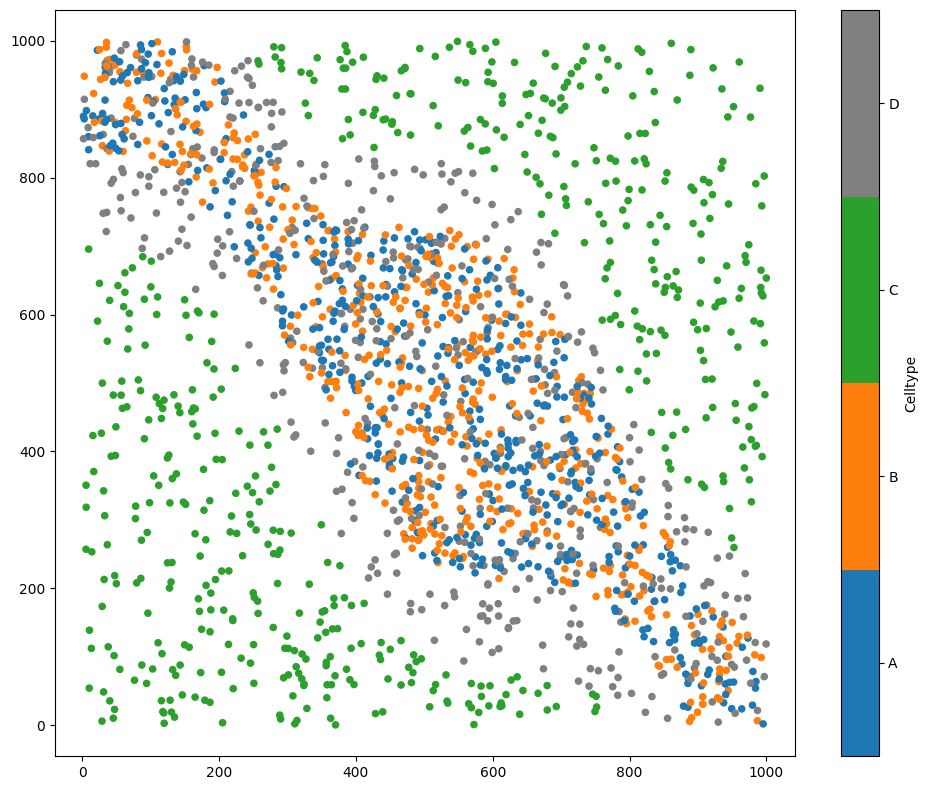

In [1]:
# Import necessary libraries
import muspan as ms
import matplotlib.pyplot as plt 

# Load the example domain dataset
example_domain = ms.datasets.load_example_domain('Synthetic-Points-Exclusion')

# Visualise the example domain, coloring by 'Celltype'
ms.visualise.visualise(example_domain, color_by='Celltype')

We'll make a hull about the points labelled 'A' or 'B', so we'll make a query to do this.

In [2]:
# Query the domain for objects with label 'Celltype' equal to 'A' or 'B'
q_A_OR_B= ms.query.query_container(('Celltype', 'A'), 'OR', ('Celltype', 'B'), domain=example_domain)

As with all conversion of objects in MuSpAn, we'll be using the `convert_objects` method within the domain class to make our convex hull. In this case, we'll need to specify the object type to be 'shape' and the conversion method to be 'convex hull'. 

In [3]:
# Convert the queried objects into a single shape using the 'convex hull' method
# This will create a new collection named 'convex hull AB' in the example_domain
example_domain.convert_objects(
    population=q_A_OR_B, 
    collection_name='convex hull AB', 
    object_type='shape', 
    conversion_method='convex hull'
)

Now let's see what shape has been created.

(<Figure size 1000x800 with 2 Axes>, <Axes: >)

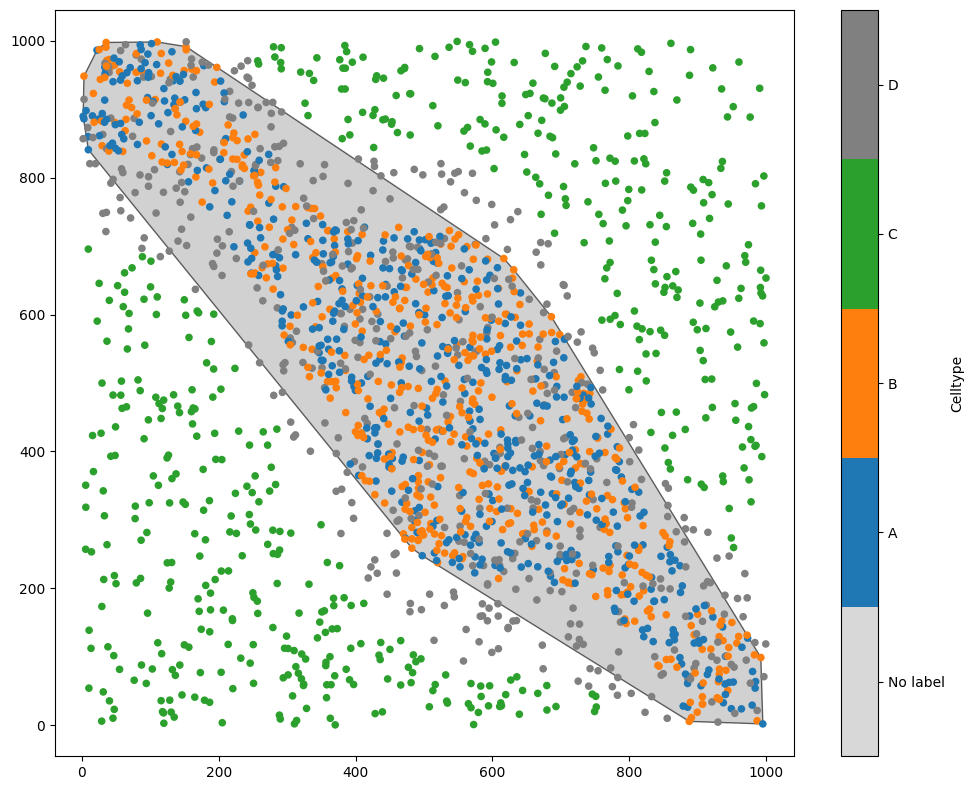

In [4]:
# Visualise the example domain again to see the newly created shape
# We will color the points by 'Celltype' to distinguish between different cell types
ms.visualise.visualise(example_domain, color_by='Celltype')

Great, we have now a shape that encloses all points with labels 'A' or 'B' which is a member of the collection 'convex hull AB'.

Note that as this is aggregating many objects into a single objects, labels cannot be transfered to our new convex hull object.